### Bibliotecas

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable
from PIL import Image
import numpy as np
import tensorflow as tf
import time
import random
from tensorflow import keras
import json

### Comparação de Métricas

In [19]:
metrics = {
    "Real": {
        "Acurácia": [0.91, 0.87],
        "Precisão": [0.92, 0.87],
        "Revocação": [0.91, 0.88],
        "F1-Score": [0.91, 0.87],
        "AUC-ROC": [0.97, 0.95],
    },
    "Fake": { 
        "Acurácia": [0.91, 0.87],
        "Precisão": [0.91, 0.88],
        "Revocação": [0.92, 0.87],
        "F1-Score": [0.91, 0.87],
        "AUC-ROC": [0.97, 0.95],
    },
}

tabela = PrettyTable()
tabela.field_names = ["Modelo", "Categoria", "Precisão", "Revocação", "F1-Score","Acurácia","AUC-ROC"]

tabela.add_row(["MobileNetV2", "Real", 
                f"{metrics['Real']['Precisão'][0]:.2f}", 
                f"{metrics['Real']['Revocação'][0]:.2f}", 
                f"{metrics['Real']['F1-Score'][0]:.2f}",
                f"{metrics['Real']['Acurácia'][0]:.2f}",
                f"{metrics['Real']['AUC-ROC'][0]:.2f}"],)

tabela.add_row(["MobileNetV2", "Fake", 
                f"{metrics['Fake']['Precisão'][0]:.2f}", 
                f"{metrics['Fake']['Revocação'][0]:.2f}", 
                f"{metrics['Fake']['F1-Score'][0]:.2f}",
                f"{metrics['Fake']['Acurácia'][0]:.2f}",
                f"{metrics['Fake']['AUC-ROC'][0]:.2f}"])

tabela.add_row(["ResNet50", "Real", 
                f"{metrics['Real']['Precisão'][1]:.2f}", 
                f"{metrics['Real']['Revocação'][1]:.2f}", 
                f"{metrics['Real']['F1-Score'][1]:.2f}",
                f"{metrics['Real']['Acurácia'][1]:.2f}", 
                f"{metrics['Real']['AUC-ROC'][1]:.2f}"])

tabela.add_row(["ResNet50", "Fake", 
                f"{metrics['Fake']['Precisão'][1]:.2f}", 
                f"{metrics['Fake']['Revocação'][1]:.2f}", 
                f"{metrics['Fake']['F1-Score'][1]:.2f}",
                f"{metrics['Fake']['Acurácia'][1]:.2f}",
                f"{metrics['Fake']['AUC-ROC'][1]:.2f}"])

print("Comparação de Desempenho:")
print(tabela)

Comparação de Desempenho:
+-------------+-----------+----------+-----------+----------+----------+---------+
|    Modelo   | Categoria | Precisão | Revocação | F1-Score | Acurácia | AUC-ROC |
+-------------+-----------+----------+-----------+----------+----------+---------+
| MobileNetV2 |    Real   |   0.92   |    0.91   |   0.91   |   0.91   |   0.97  |
| MobileNetV2 |    Fake   |   0.91   |    0.92   |   0.91   |   0.91   |   0.97  |
|   ResNet50  |    Real   |   0.87   |    0.88   |   0.87   |   0.87   |   0.95  |
|   ResNet50  |    Fake   |   0.88   |    0.87   |   0.87   |   0.87   |   0.95  |
+-------------+-----------+----------+-----------+----------+----------+---------+


In [20]:
with open('../history_mobile.json','r') as file:
    data_mobile = json.load(file)
with open('../history_resnet.json','r') as file:
    data_resnet = json.load(file)

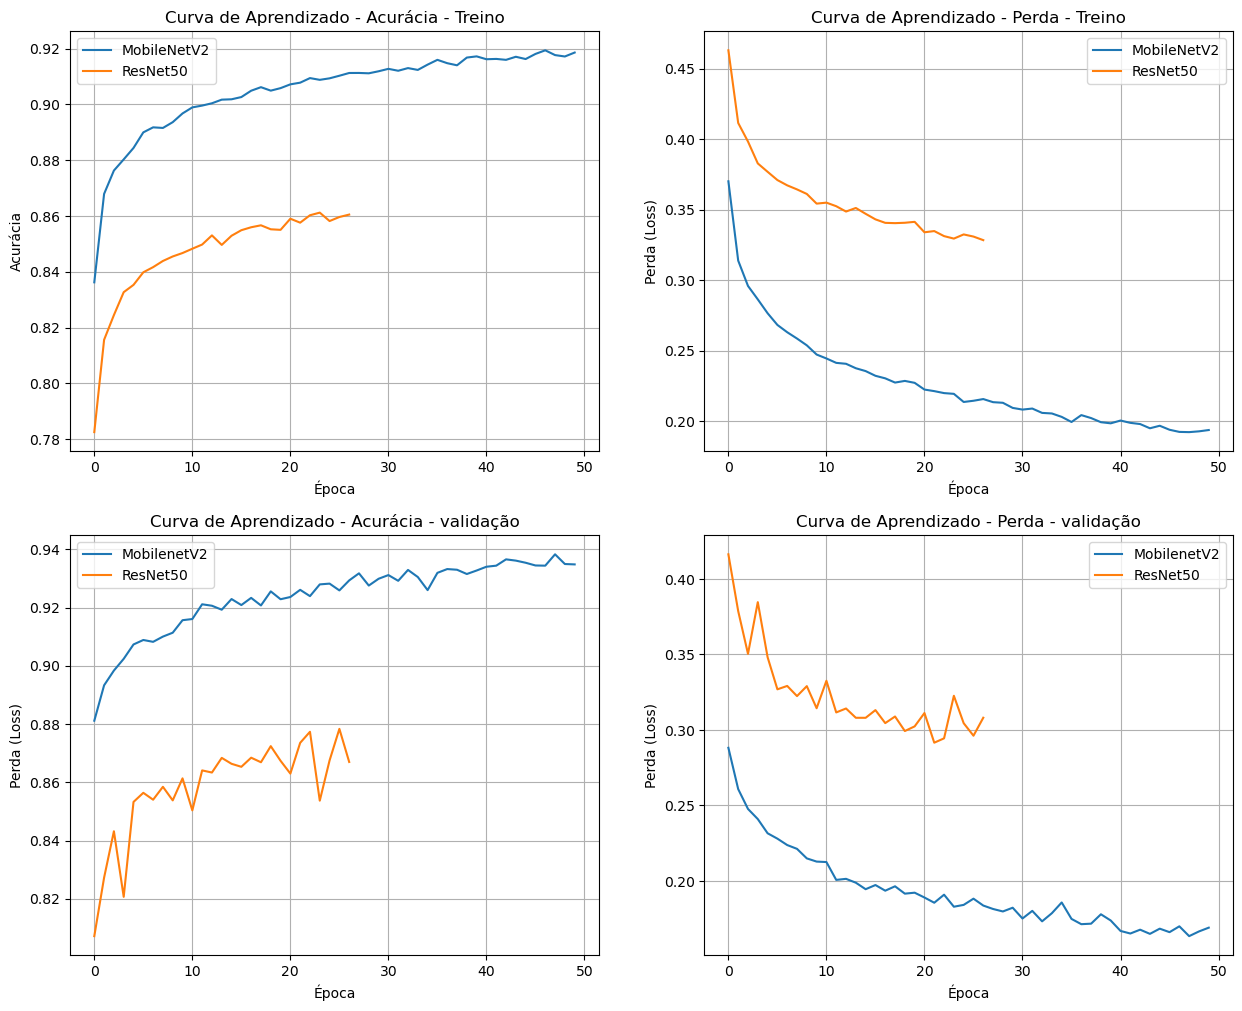

In [21]:
plt.figure(figsize=(15,12))
# Acurácia
plt.subplot(2, 2, 1)
plt.plot(data_mobile['accuracy'], label='MobileNetV2')
plt.plot(data_resnet['accuracy'], label='ResNet50')
plt.title("Curva de Aprendizado - Acurácia - Treino")
plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.legend()
plt.grid()

# Perda
plt.subplot(2, 2, 2)
plt.plot(data_mobile['loss'], label='MobileNetV2')
plt.plot(data_resnet['loss'], label='ResNet50')
plt.title("Curva de Aprendizado - Perda - Treino")
plt.xlabel("Época")
plt.ylabel("Perda (Loss)")
plt.legend()
plt.grid()

# Validação da acurácia
plt.subplot(2, 2, 3)
plt.plot(data_mobile['val_accuracy'], label='MobilenetV2')
plt.plot(data_resnet['val_accuracy'], label='ResNet50')
plt.title("Curva de Aprendizado - Acurácia - validação")
plt.xlabel("Época")
plt.ylabel("Perda (Loss)")
plt.legend()
plt.grid()

# Validação da perda
plt.subplot(2, 2, 4)
plt.plot(data_mobile['val_loss'], label='MobilenetV2')
plt.plot(data_resnet['val_loss'], label='ResNet50')
plt.title("Curva de Aprendizado - Perda - validação")
plt.xlabel("Época")
plt.ylabel("Perda (Loss)")
plt.legend()
plt.grid()

plt.show()

#### Teste do modelo ResNet50

In [22]:
resnet_path = "../resnet.keras"

resnet = keras.models.load_model(resnet_path)

In [23]:
# Carregando o conjunto de imagens de teste

img_size = (224, 224)
batch_size = 32
path_test = "../data/test"

ds_test = tf.keras.utils.image_dataset_from_directory(
    path_test,
    label_mode='int',
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False
)

class_names = ds_test.class_names

Found 20000 files belonging to 2 classes.


In [24]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
ds_test = ds_test.map(lambda x, y: (normalization_layer(x), y))

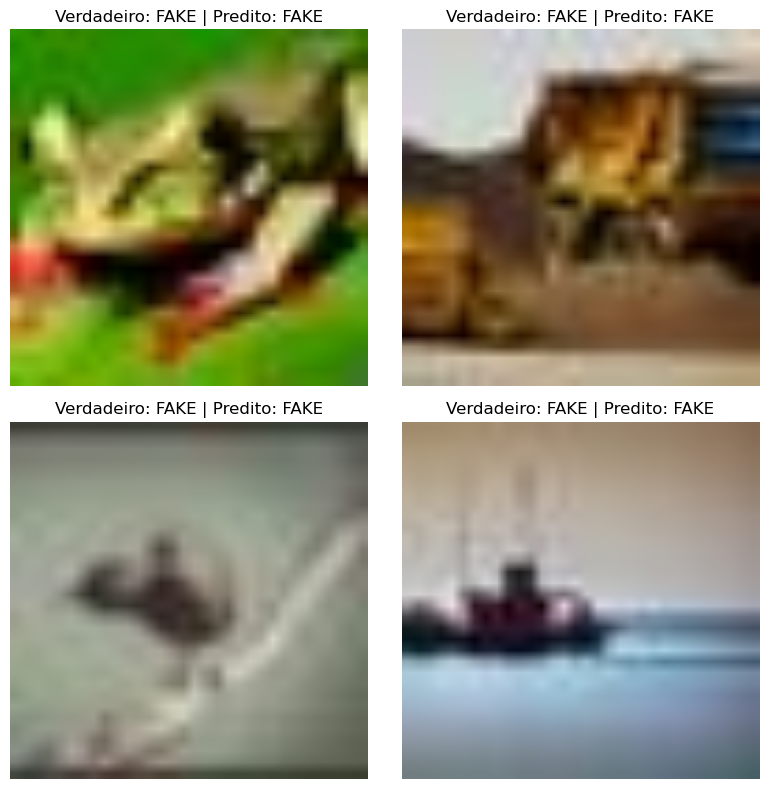

In [25]:
# Seleciona 4 imagens aleatórias de um batch aleatório
for imagens, labels in ds_test.shuffle(1000).take(1):
    indices = random.sample(range(len(imagens)), 4)
    selected_images = [imagens[i] for i in indices]
    selected_labels = [labels[i].numpy() for i in indices]

    plt.figure(figsize=(8, 8))
    for i, (img, true_label) in enumerate(zip(selected_images, selected_labels)):
        img_resized = tf.image.resize(img, (224, 224))
        pred = resnet.predict(tf.expand_dims(img_resized, axis=0), verbose=0)
        pred_label = tf.argmax(pred[0]).numpy()

        plt.subplot(2, 2, i + 1)
        plt.imshow(img.numpy(), vmin=0.0, vmax=1.0)
        plt.title(f"Verdadeiro: {class_names[true_label]} | Predito: {class_names[pred_label]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

### Análise dos Resultados